<a href="https://colab.research.google.com/github/Ameni-Mkaouar/maps/blob/main/Howland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.4 MB/s eta 0:00:00


In [2]:
pip install matplotlib-scalebar

http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=-7653216.832776638,5653150.599893043,-7651571.802786608,5654884.400019638&bboxSR=3857&imageSR=3857&size=1000,1053&dpi=100&format=png32&transparent=true&f=image


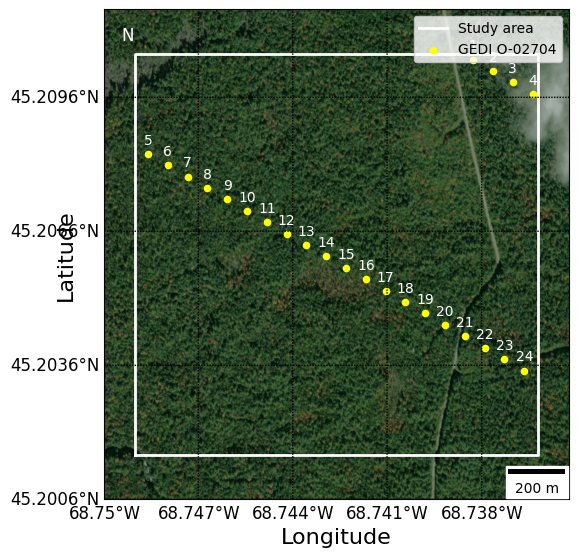

In [5]:

#matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib_scalebar.scalebar import ScaleBar

# Define the bounding box of your site
site_min_lon = -68.7490165356405
site_max_lon = -68.73623897981172
site_min_lat =  45.20155741067766
site_max_lat =  45.210530916585036

# Define additional padding for the bounding box
padding = 0.001  # in degrees

# Define the bounding box of the map
map_min_lon = site_min_lon - padding
map_max_lon = site_max_lon + padding
map_min_lat = site_min_lat - padding
map_max_lat = site_max_lat + padding

points_lon = [-68.73828437287361, -68.73765491590093, -68.73702559664608,
       -68.7363945228749 , -68.7486207076422 , -68.74799124553248,
       -68.74736168677029, -68.74673230389989, -68.7461029542425 ,
       -68.74547297247568, -68.74484283627608, -68.74421379915785,
       -68.74358361564963, -68.74295439307404, -68.74232462593201,
       -68.74169513352125, -68.74106619833194, -68.74043718899757,
       -68.73980786372772, -68.73917855368339, -68.73854889048717,
       -68.73792007666702, -68.73729080751585, -68.73666177706434]
points_lat = [45.21040237264752 , 45.21014675853818 , 45.20989117910469 ,
       45.209634897209   , 45.2082944759644  , 45.208038925244736,
       45.207783333601625, 45.207527826736495, 45.20727233641911 ,
       45.20701655000386 , 45.20676068916209 , 45.20650533837905 ,
       45.20624944624005 , 45.205993996282615, 45.20573828319723 ,
       45.20548268835445 , 45.20522734220135 , 45.20497194796583 ,
       45.20471639106636 , 45.20446082470207 , 45.20420507493338 ,
       45.20394970259363 , 45.2036940959446  , 45.20343857788863 ]

#points_lon1 = []
#points_lat1 = []

fig, ax = plt.subplots(figsize=(6, 8))

m = Basemap(ax=ax, projection='merc',
            llcrnrlon=map_min_lon, llcrnrlat=map_min_lat,
            urcrnrlon=map_max_lon, urcrnrlat=map_max_lat,
            resolution='i', epsg=3857)

m.arcgisimage(service='World_Imagery', xpixels=1000, dpi=100, verbose=True)

x_site, y_site = m([site_min_lon, site_max_lon, site_max_lon, site_min_lon, site_min_lon],
                   [site_min_lat, site_min_lat, site_max_lat, site_max_lat, site_min_lat])
ax.plot(x_site, y_site, marker=None, color='white', linewidth=2, label='Study area')


x, y = m(points_lon, points_lat)
ax.scatter(x, y, marker='o', color='yellow', label='GEDI O-02704', s=20)

for i, (px, py) in enumerate(zip(points_lon, points_lat), 1):
    ax.annotate(str(i), xy=m(px, py), xytext=(0, 5), textcoords='offset points', fontsize=10, color='white', ha='center', va='bottom')

#x1, y1 = m(points_lon1, points_lat1)
#ax.scatter(x1, y1, marker='o', color='red', label='GEDI O-19256', s=20)

#for i, (px1, py1) in enumerate(zip(points_lon1, points_lat1), 1):
#    ax.annotate(str(i), xy=m(px1, py1), xytext=(0, 5), textcoords='offset points', fontsize=12, color='white', ha='center', va='bottom')

# Add scale bar
scale_bar = ScaleBar(1, location='lower right')  # 1 pixel = 1 unit of whatever the coordinates are in
ax.add_artist(scale_bar)

# Add northing
northing_x, northing_y = m(site_min_lon, site_max_lat)
ax.annotate('N', xy=(northing_x, northing_y), xytext=(-10, 10),
            textcoords='offset points', fontsize=12, color='white')

# Add labels
ax.set_xlabel('Longitude', labelpad=20, fontsize=16)
ax.set_ylabel('Latitude', labelpad=20, fontsize=16)

# Set the ticks using Basemap instance
lon_ticks = np.arange(map_min_lon, map_max_lon, 0.003)
lat_ticks = np.arange(map_min_lat, map_max_lat, 0.003)
m.drawparallels(lat_ticks, labels=[True, False, False, False], fontsize=12)
m.drawmeridians(lon_ticks, labels=[False, False, False, True],fontsize=12)
# Add legend
plt.legend(loc='upper right', fontsize=10)

# Save the plot as SVG file
plt.savefig('howlandmap_plot.svg', format='svg')

# Show the plot
plt.show()